In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
df = pd.read_csv('phe_cases_london_boroughs.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27584 entries, 0 to 27583
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   area_name    27584 non-null  object
 1   area_code    27584 non-null  object
 2   date         27584 non-null  object
 3   new_cases    27584 non-null  int64 
 4   total_cases  27584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,area_name,area_code,date,new_cases,total_cases
0,Barking and Dagenham,E09000002,2020/2/3,0,0
1,Barnet,E09000003,2020/2/3,0,0
2,Bexley,E09000004,2020/2/3,0,0
3,Brent,E09000005,2020/2/3,0,0
4,Bromley,E09000006,2020/2/3,0,0


In [5]:
df2=df[df.area_code=='E09000002']

df2["Barking_and_Dagenham_new_cases"] = df2["new_cases"]
df2["Barking_and_Dagenham_total_cases"] = df2["total_cases"]
df2.drop('new_cases', inplace=True, axis=1)
df2.drop('total_cases', inplace=True, axis=1)
df2.drop('area_code', inplace=True, axis=1)
df2.drop('area_name', inplace=True, axis=1)
df2.head()

<ipython-input-5-ace58d619ed8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Barking_and_Dagenham_new_cases"] = df2["new_cases"]
<ipython-input-5-ace58d619ed8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Barking_and_Dagenham_total_cases"] = df2["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,date,Barking_and_Dagenham_new_cases,Barking_and_Dagenham_total_cases
0,2020/2/3,0,0
32,2020/2/4,0,0
64,2020/2/5,0,0
96,2020/2/6,0,0
128,2020/2/7,0,0


In [6]:
df3=df[df.area_code=='E09000003']

df3["Barnet_new_cases"] = df3["new_cases"]
df3["Barnet_total_cases"] = df3["total_cases"]
df3.drop('new_cases', inplace=True, axis=1)
df3.drop('total_cases', inplace=True, axis=1)
df3.drop('area_code', inplace=True, axis=1)
df3.drop('area_name', inplace=True, axis=1)
df3.head()

<ipython-input-6-dd81ba590145>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Barnet_new_cases"] = df3["new_cases"]
<ipython-input-6-dd81ba590145>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Barnet_total_cases"] = df3["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,date,Barnet_new_cases,Barnet_total_cases
1,2020/2/3,0,0
33,2020/2/4,0,0
65,2020/2/5,0,0
97,2020/2/6,0,0
129,2020/2/7,0,0


In [7]:
df4=df[df.area_code=='E09000004']

df4["Bexley_new_cases"] = df4["new_cases"]
df4["Bexley_total_cases"] = df4["total_cases"]
df4.drop('new_cases', inplace=True, axis=1)
df4.drop('total_cases', inplace=True, axis=1)
df4.drop('area_code', inplace=True, axis=1)
df4.drop('area_name', inplace=True, axis=1)
df4.head()

<ipython-input-7-6ff451203839>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Bexley_new_cases"] = df4["new_cases"]
<ipython-input-7-6ff451203839>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Bexley_total_cases"] = df4["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,date,Bexley_new_cases,Bexley_total_cases
2,2020/2/3,0,0
34,2020/2/4,0,0
66,2020/2/5,0,0
98,2020/2/6,0,0
130,2020/2/7,0,0


In [8]:
df5=df[df.area_code=='E09000005']

df5["Brent_new_cases"] = df5["new_cases"]
df5["Brent_total_cases"] = df5["total_cases"]
df5.drop('new_cases', inplace=True, axis=1)
df5.drop('total_cases', inplace=True, axis=1)
df5.drop('area_code', inplace=True, axis=1)
df5.drop('area_name', inplace=True, axis=1)
df5.head()

<ipython-input-8-7fc3989f25ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["Brent_new_cases"] = df5["new_cases"]
<ipython-input-8-7fc3989f25ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["Brent_total_cases"] = df5["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

,date,Brent_new_cases,Brent_total_cases
3,2020/2/3,0,0
35,2020/2/4,0,0
67,2020/2/5,0,0
99,2020/2/6,0,0
131,2020/2/7,0,0


In [9]:
df6=df[df.area_code=='E09000006']

df6["Bromley_new_cases"] = df6["new_cases"]
df6["Bromley_total_cases"] = df6["total_cases"]
df6.drop('new_cases', inplace=True, axis=1)
df6.drop('total_cases', inplace=True, axis=1)
df6.drop('area_code', inplace=True, axis=1)
df6.drop('area_name', inplace=True, axis=1)
df6.head()

<ipython-input-9-8186780de2f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["Bromley_new_cases"] = df6["new_cases"]
<ipython-input-9-8186780de2f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["Bromley_total_cases"] = df6["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,date,Bromley_new_cases,Bromley_total_cases
4,2020/2/3,0,0
36,2020/2/4,0,0
68,2020/2/5,0,0
100,2020/2/6,0,0
132,2020/2/7,0,0


In [10]:
df7=df[df.area_code=='E09000007']

df7["Camden_new_cases"] = df7["new_cases"]
df7["Camden_total_cases"] = df7["total_cases"]
df7.drop('new_cases', inplace=True, axis=1)
df7.drop('total_cases', inplace=True, axis=1)
df7.drop('area_code', inplace=True, axis=1)
df7.drop('area_name', inplace=True, axis=1)
df7.head()

<ipython-input-10-7c7490f9e1b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7["Camden_new_cases"] = df7["new_cases"]
<ipython-input-10-7c7490f9e1b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7["Camden_total_cases"] = df7["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,date,Camden_new_cases,Camden_total_cases
5,2020/2/3,0,0
37,2020/2/4,0,0
69,2020/2/5,0,0
101,2020/2/6,0,0
133,2020/2/7,0,0


In [11]:
df8=df[df.area_code=='E09000008']

df8["Croydon_new_cases"] = df8["new_cases"]
df8["Croydon_total_cases"] = df8["total_cases"]
df8.drop('new_cases', inplace=True, axis=1)
df8.drop('total_cases', inplace=True, axis=1)
df8.drop('area_code', inplace=True, axis=1)
df8.drop('area_name', inplace=True, axis=1)
df8.head()

<ipython-input-11-80bc25418c29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8["Croydon_new_cases"] = df8["new_cases"]
<ipython-input-11-80bc25418c29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8["Croydon_total_cases"] = df8["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,date,Croydon_new_cases,Croydon_total_cases
6,2020/2/3,0,0
38,2020/2/4,0,0
70,2020/2/5,0,0
102,2020/2/6,0,0
134,2020/2/7,0,0


In [12]:
df9=df[df.area_code=='E09000009']

df9["Ealing_new_cases"] = df9["new_cases"]
df9["Ealing_total_cases"] = df9["total_cases"]
df9.drop('new_cases', inplace=True, axis=1)
df9.drop('total_cases', inplace=True, axis=1)
df9.drop('area_code', inplace=True, axis=1)
df9.drop('area_name', inplace=True, axis=1)
df9.head()

<ipython-input-12-8460badcbc69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9["Ealing_new_cases"] = df9["new_cases"]
<ipython-input-12-8460badcbc69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9["Ealing_total_cases"] = df9["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,date,Ealing_new_cases,Ealing_total_cases
7,2020/2/3,0,0
39,2020/2/4,0,0
71,2020/2/5,0,0
103,2020/2/6,0,0
135,2020/2/7,0,0


In [13]:
df10=df[df.area_code=='E09000010']

df10["Enfield_new_cases"] = df10["new_cases"]
df10["Enfield_total_cases"] = df10["total_cases"]
df10.drop('new_cases', inplace=True, axis=1)
df10.drop('total_cases', inplace=True, axis=1)
df10.drop('area_code', inplace=True, axis=1)
df10.drop('area_name', inplace=True, axis=1)
df10.head()

<ipython-input-13-79db75e64e5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10["Enfield_new_cases"] = df10["new_cases"]
<ipython-input-13-79db75e64e5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10["Enfield_total_cases"] = df10["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,date,Enfield_new_cases,Enfield_total_cases
8,2020/2/3,0,0
40,2020/2/4,0,0
72,2020/2/5,0,0
104,2020/2/6,0,0
136,2020/2/7,0,0


In [14]:
df11=df[df.area_code=='E09000011']

df11["Greenwich_new_cases"] = df11["new_cases"]
df11["Greenwich_total_cases"] = df11["total_cases"]
df11.drop('new_cases', inplace=True, axis=1)
df11.drop('total_cases', inplace=True, axis=1)
df11.drop('area_code', inplace=True, axis=1)
df11.drop('area_name', inplace=True, axis=1)
df11.head()

<ipython-input-14-9301a6cb78f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11["Greenwich_new_cases"] = df11["new_cases"]
<ipython-input-14-9301a6cb78f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11["Greenwich_total_cases"] = df11["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,date,Greenwich_new_cases,Greenwich_total_cases
9,2020/2/3,0,0
41,2020/2/4,0,0
73,2020/2/5,0,0
105,2020/2/6,0,0
137,2020/2/7,0,0


In [15]:
df12=df[df.area_code=='E09000012']

df12["Hackney_and_City_of_London_new_cases"] = df12["new_cases"]
df12["Hackney_and_City_of_London_total_cases"] = df12["total_cases"]
df12.drop('new_cases', inplace=True, axis=1)
df12.drop('total_cases', inplace=True, axis=1)
df12.drop('area_code', inplace=True, axis=1)
df12.drop('area_name', inplace=True, axis=1)
df12.head()

<ipython-input-15-152647ed1d1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12["Hackney_and_City_of_London_new_cases"] = df12["new_cases"]
<ipython-input-15-152647ed1d1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12["Hackney_and_City_of_London_total_cases"] = df12["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

,date,Hackney_and_City_of_London_new_cases,Hackney_and_City_of_London_total_cases
10,2020/2/3,0,0
42,2020/2/4,0,0
74,2020/2/5,0,0
106,2020/2/6,0,0
138,2020/2/7,0,0


In [16]:
df13=df[df.area_code=='E09000013']

df13["Hammersmith_and_Fulham_new_cases"] = df13["new_cases"]
df13["Hammersmith_and_Fulham_total_cases"] = df13["total_cases"]
df13.drop('new_cases', inplace=True, axis=1)
df13.drop('total_cases', inplace=True, axis=1)
df13.drop('area_code', inplace=True, axis=1)
df13.drop('area_name', inplace=True, axis=1)
df13.head()

<ipython-input-16-73009268b815>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13["Hammersmith_and_Fulham_new_cases"] = df13["new_cases"]
<ipython-input-16-73009268b815>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13["Hammersmith_and_Fulham_total_cases"] = df13["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,date,Hammersmith_and_Fulham_new_cases,Hammersmith_and_Fulham_total_cases
11,2020/2/3,0,0
43,2020/2/4,0,0
75,2020/2/5,0,0
107,2020/2/6,0,0
139,2020/2/7,0,0


In [17]:
df14=df[df.area_code=='E09000014']

df14["Haringey_new_cases"] = df14["new_cases"]
df14["Haringey_total_cases"] = df14["total_cases"]
df14.drop('new_cases', inplace=True, axis=1)
df14.drop('total_cases', inplace=True, axis=1)
df14.drop('area_code', inplace=True, axis=1)
df14.drop('area_name', inplace=True, axis=1)
df14.head()

<ipython-input-17-3c6e55a95746>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df14["Haringey_new_cases"] = df14["new_cases"]
<ipython-input-17-3c6e55a95746>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df14["Haringey_total_cases"] = df14["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,date,Haringey_new_cases,Haringey_total_cases
12,2020/2/3,0,0
44,2020/2/4,0,0
76,2020/2/5,0,0
108,2020/2/6,0,0
140,2020/2/7,0,0


In [18]:
df15=df[df.area_code=='E09000015']

df15["Harrow_new_cases"] = df15["new_cases"]
df15["Harrow_total_cases"] = df15["total_cases"]
df15.drop('new_cases', inplace=True, axis=1)
df15.drop('total_cases', inplace=True, axis=1)
df15.drop('area_code', inplace=True, axis=1)
df15.drop('area_name', inplace=True, axis=1)
df15.head()

<ipython-input-18-9a79359cfeb7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15["Harrow_new_cases"] = df15["new_cases"]
<ipython-input-18-9a79359cfeb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15["Harrow_total_cases"] = df15["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,date,Harrow_new_cases,Harrow_total_cases
13,2020/2/3,0,0
45,2020/2/4,0,0
77,2020/2/5,0,0
109,2020/2/6,0,0
141,2020/2/7,0,0


In [19]:
df16=df[df.area_code=='E09000016']

df16["Havering_new_cases"] = df16["new_cases"]
df16["Havering_total_cases"] = df16["total_cases"]
df16.drop('new_cases', inplace=True, axis=1)
df16.drop('total_cases', inplace=True, axis=1)
df16.drop('area_code', inplace=True, axis=1)
df16.drop('area_name', inplace=True, axis=1)
df16.head()

<ipython-input-19-50cd720203e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16["Havering_new_cases"] = df16["new_cases"]
<ipython-input-19-50cd720203e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16["Havering_total_cases"] = df16["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,date,Havering_new_cases,Havering_total_cases
14,2020/2/3,0,0
46,2020/2/4,0,0
78,2020/2/5,0,0
110,2020/2/6,0,0
142,2020/2/7,0,0


In [20]:
df17=df[df.area_code=='E09000017']

df17["Hillingdon_new_cases"] = df17["new_cases"]
df17["Hillingdon_total_cases"] = df17["total_cases"]
df17.drop('new_cases', inplace=True, axis=1)
df17.drop('total_cases', inplace=True, axis=1)
df17.drop('area_code', inplace=True, axis=1)
df17.drop('area_name', inplace=True, axis=1)
df17.head()

<ipython-input-20-4408e2d359da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df17["Hillingdon_new_cases"] = df17["new_cases"]
<ipython-input-20-4408e2d359da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df17["Hillingdon_total_cases"] = df17["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,date,Hillingdon_new_cases,Hillingdon_total_cases
15,2020/2/3,0,0
47,2020/2/4,0,0
79,2020/2/5,0,0
111,2020/2/6,0,0
143,2020/2/7,0,0


In [21]:
df18=df[df.area_code=='E09000018']

df18["Hounslow_new_cases"] = df18["new_cases"]
df18["Hounslow_total_cases"] = df18["total_cases"]
df18.drop('new_cases', inplace=True, axis=1)
df18.drop('total_cases', inplace=True, axis=1)
df18.drop('area_code', inplace=True, axis=1)
df18.drop('area_name', inplace=True, axis=1)
df18.head()

<ipython-input-21-a79613535e00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18["Hounslow_new_cases"] = df18["new_cases"]
<ipython-input-21-a79613535e00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18["Hounslow_total_cases"] = df18["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,date,Hounslow_new_cases,Hounslow_total_cases
16,2020/2/3,0,0
48,2020/2/4,0,0
80,2020/2/5,0,0
112,2020/2/6,0,0
144,2020/2/7,0,0


In [22]:
df19=df[df.area_code=='E09000019']

df19["Islington_new_cases"] = df19["new_cases"]
df19["Islington_total_cases"] = df19["total_cases"]
df19.drop('new_cases', inplace=True, axis=1)
df19.drop('total_cases', inplace=True, axis=1)
df19.drop('area_code', inplace=True, axis=1)
df19.drop('area_name', inplace=True, axis=1)
df19.head()

<ipython-input-22-9f8e64a58a85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df19["Islington_new_cases"] = df19["new_cases"]
<ipython-input-22-9f8e64a58a85>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df19["Islington_total_cases"] = df19["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,date,Islington_new_cases,Islington_total_cases
17,2020/2/3,0,0
49,2020/2/4,0,0
81,2020/2/5,0,0
113,2020/2/6,0,0
145,2020/2/7,0,0


In [23]:
df20=df[df.area_code=='E09000020']

df20["Kensington_and_Chelsea_new_cases"] = df20["new_cases"]
df20["Kensington_and_Chelsea_total_cases"] = df20["total_cases"]
df20.drop('new_cases', inplace=True, axis=1)
df20.drop('total_cases', inplace=True, axis=1)
df20.drop('area_code', inplace=True, axis=1)
df20.drop('area_name', inplace=True, axis=1)
df20.head()

<ipython-input-23-9b8e1156e1be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20["Kensington_and_Chelsea_new_cases"] = df20["new_cases"]
<ipython-input-23-9b8e1156e1be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20["Kensington_and_Chelsea_total_cases"] = df20["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,date,Kensington_and_Chelsea_new_cases,Kensington_and_Chelsea_total_cases
18,2020/2/3,0,0
50,2020/2/4,0,0
82,2020/2/5,0,0
114,2020/2/6,0,0
146,2020/2/7,0,0


In [24]:
df21=df[df.area_code=='E09000021']

df21["Kingston_upon_Thames_new_cases"] = df21["new_cases"]
df21["Kingston_upon_Thames_total_cases"] = df21["total_cases"]
df21.drop('new_cases', inplace=True, axis=1)
df21.drop('total_cases', inplace=True, axis=1)
df21.drop('area_code', inplace=True, axis=1)
df21.drop('area_name', inplace=True, axis=1)
df21.head()

<ipython-input-24-e3a838fd9969>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df21["Kingston_upon_Thames_new_cases"] = df21["new_cases"]
<ipython-input-24-e3a838fd9969>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df21["Kingston_upon_Thames_total_cases"] = df21["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,date,Kingston_upon_Thames_new_cases,Kingston_upon_Thames_total_cases
19,2020/2/3,0,0
51,2020/2/4,0,0
83,2020/2/5,0,0
115,2020/2/6,0,0
147,2020/2/7,0,0


In [25]:
df22=df[df.area_code=='E09000022']

df22["Lambeth_new_cases"] = df22["new_cases"]
df22["Lambeth_total_cases"] = df22["total_cases"]
df22.drop('new_cases', inplace=True, axis=1)
df22.drop('total_cases', inplace=True, axis=1)
df22.drop('area_code', inplace=True, axis=1)
df22.drop('area_name', inplace=True, axis=1)
df22.head()

<ipython-input-25-b1672efe708b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22["Lambeth_new_cases"] = df22["new_cases"]
<ipython-input-25-b1672efe708b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22["Lambeth_total_cases"] = df22["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,date,Lambeth_new_cases,Lambeth_total_cases
20,2020/2/3,0,0
52,2020/2/4,0,0
84,2020/2/5,0,0
116,2020/2/6,0,0
148,2020/2/7,0,0


In [26]:
df23=df[df.area_code=='E09000023']

df23["Lewisham_new_cases"] = df23["new_cases"]
df23["Lewisham_total_cases"] = df23["total_cases"]
df23.drop('new_cases', inplace=True, axis=1)
df23.drop('total_cases', inplace=True, axis=1)
df23.drop('area_code', inplace=True, axis=1)
df23.drop('area_name', inplace=True, axis=1)
df23.head()

<ipython-input-26-039ad5bdc5db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df23["Lewisham_new_cases"] = df23["new_cases"]
<ipython-input-26-039ad5bdc5db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df23["Lewisham_total_cases"] = df23["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,date,Lewisham_new_cases,Lewisham_total_cases
21,2020/2/3,0,0
53,2020/2/4,0,0
85,2020/2/5,0,0
117,2020/2/6,0,0
149,2020/2/7,0,0


In [27]:
df24=df[df.area_code=='E09000024']

df24["Merton_new_cases"] = df24["new_cases"]
df24["Merton_total_cases"] = df24["total_cases"]
df24.drop('new_cases', inplace=True, axis=1)
df24.drop('total_cases', inplace=True, axis=1)
df24.drop('area_code', inplace=True, axis=1)
df24.drop('area_name', inplace=True, axis=1)
df24.head()

<ipython-input-27-2711458c9d91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df24["Merton_new_cases"] = df24["new_cases"]
<ipython-input-27-2711458c9d91>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df24["Merton_total_cases"] = df24["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,date,Merton_new_cases,Merton_total_cases
22,2020/2/3,1,1
54,2020/2/4,0,1
86,2020/2/5,0,1
118,2020/2/6,0,1
150,2020/2/7,0,1


In [28]:
df25=df[df.area_code=='E09000025']

df25["Newham_new_cases"] = df25["new_cases"]
df25["Newham_total_cases"] = df25["total_cases"]
df25.drop('new_cases', inplace=True, axis=1)
df25.drop('total_cases', inplace=True, axis=1)
df25.drop('area_code', inplace=True, axis=1)
df25.drop('area_name', inplace=True, axis=1)
df25.head()

<ipython-input-28-f087aa05a15f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df25["Newham_new_cases"] = df25["new_cases"]
<ipython-input-28-f087aa05a15f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df25["Newham_total_cases"] = df25["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,date,Newham_new_cases,Newham_total_cases
23,2020/2/3,0,0
55,2020/2/4,0,0
87,2020/2/5,0,0
119,2020/2/6,0,0
151,2020/2/7,0,0


In [29]:
df26=df[df.area_code=='E09000026']

df26["Redbridge_new_cases"] = df26["new_cases"]
df26["Redbridge_total_cases"] = df26["total_cases"]
df26.drop('new_cases', inplace=True, axis=1)
df26.drop('total_cases', inplace=True, axis=1)
df26.drop('area_code', inplace=True, axis=1)
df26.drop('area_name', inplace=True, axis=1)
df26.head()

<ipython-input-29-fec6af9c0f78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df26["Redbridge_new_cases"] = df26["new_cases"]
<ipython-input-29-fec6af9c0f78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df26["Redbridge_total_cases"] = df26["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,date,Redbridge_new_cases,Redbridge_total_cases
24,2020/2/3,0,0
56,2020/2/4,0,0
88,2020/2/5,0,0
120,2020/2/6,0,0
152,2020/2/7,0,0


In [30]:
df27=df[df.area_code=='E09000027']

df27["Richmond_upon_Thames_new_cases"] = df27["new_cases"]
df27["Richmond_upon_Thames_total_cases"] = df27["total_cases"]
df27.drop('new_cases', inplace=True, axis=1)
df27.drop('total_cases', inplace=True, axis=1)
df27.drop('area_code', inplace=True, axis=1)
df27.drop('area_name', inplace=True, axis=1)
df27.head()

<ipython-input-30-4c5e21852223>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df27["Richmond_upon_Thames_new_cases"] = df27["new_cases"]
<ipython-input-30-4c5e21852223>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df27["Richmond_upon_Thames_total_cases"] = df27["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,date,Richmond_upon_Thames_new_cases,Richmond_upon_Thames_total_cases
25,2020/2/3,0,0
57,2020/2/4,0,0
89,2020/2/5,0,0
121,2020/2/6,0,0
153,2020/2/7,0,0


In [31]:
df28=df[df.area_code=='E09000028']

df28["Southwark_new_cases"] = df28["new_cases"]
df28["Southwark_total_cases"] = df28["total_cases"]
df28.drop('new_cases', inplace=True, axis=1)
df28.drop('total_cases', inplace=True, axis=1)
df28.drop('area_code', inplace=True, axis=1)
df28.drop('area_name', inplace=True, axis=1)
df28.head()

<ipython-input-31-a1398a89717e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df28["Southwark_new_cases"] = df28["new_cases"]
<ipython-input-31-a1398a89717e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df28["Southwark_total_cases"] = df28["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,date,Southwark_new_cases,Southwark_total_cases
26,2020/2/3,0,0
58,2020/2/4,0,0
90,2020/2/5,0,0
122,2020/2/6,0,0
154,2020/2/7,0,0


In [32]:
df29=df[df.area_code=='E09000029']

df29["Sutton_new_cases"] = df29["new_cases"]
df29["Sutton_total_cases"] = df29["total_cases"]
df29.drop('new_cases', inplace=True, axis=1)
df29.drop('total_cases', inplace=True, axis=1)
df29.drop('area_code', inplace=True, axis=1)
df29.drop('area_name', inplace=True, axis=1)
df29.head()

<ipython-input-32-f9ce1432daab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df29["Sutton_new_cases"] = df29["new_cases"]
<ipython-input-32-f9ce1432daab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df29["Sutton_total_cases"] = df29["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,date,Sutton_new_cases,Sutton_total_cases
27,2020/2/3,0,0
59,2020/2/4,0,0
91,2020/2/5,0,0
123,2020/2/6,0,0
155,2020/2/7,0,0


In [33]:
df30=df[df.area_code=='E09000030']

df30["Tower_Hamlets_new_cases"] = df30["new_cases"]
df30["Tower_Hamlets_total_cases"] = df30["total_cases"]
df30.drop('new_cases', inplace=True, axis=1)
df30.drop('total_cases', inplace=True, axis=1)
df30.drop('area_code', inplace=True, axis=1)
df30.drop('area_name', inplace=True, axis=1)
df30.head()

<ipython-input-33-176ed3a22bd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df30["Tower_Hamlets_new_cases"] = df30["new_cases"]
<ipython-input-33-176ed3a22bd1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df30["Tower_Hamlets_total_cases"] = df30["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,date,Tower_Hamlets_new_cases,Tower_Hamlets_total_cases
28,2020/2/3,0,0
60,2020/2/4,0,0
92,2020/2/5,0,0
124,2020/2/6,0,0
156,2020/2/7,0,0


In [34]:
df31=df[df.area_code=='E09000031']

df31["Waltham_Forest_new_cases"] = df31["new_cases"]
df31["Waltham_Forest_total_cases"] = df31["total_cases"]
df31.drop('new_cases', inplace=True, axis=1)
df31.drop('total_cases', inplace=True, axis=1)
df31.drop('area_code', inplace=True, axis=1)
df31.drop('area_name', inplace=True, axis=1)
df31.head()

<ipython-input-34-5afead8a420f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df31["Waltham_Forest_new_cases"] = df31["new_cases"]
<ipython-input-34-5afead8a420f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df31["Waltham_Forest_total_cases"] = df31["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,date,Waltham_Forest_new_cases,Waltham_Forest_total_cases
29,2020/2/3,0,0
61,2020/2/4,0,0
93,2020/2/5,0,0
125,2020/2/6,0,0
157,2020/2/7,0,0


In [35]:
df32=df[df.area_code=='E09000032']

df32["Wandsworth_new_cases"] = df32["new_cases"]
df32["Wandsworth_total_cases"] = df32["total_cases"]
df32.drop('new_cases', inplace=True, axis=1)
df32.drop('total_cases', inplace=True, axis=1)
df32.drop('area_code', inplace=True, axis=1)
df32.drop('area_name', inplace=True, axis=1)
df32.head()

<ipython-input-35-dab47e307554>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df32["Wandsworth_new_cases"] = df32["new_cases"]
<ipython-input-35-dab47e307554>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df32["Wandsworth_total_cases"] = df32["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,date,Wandsworth_new_cases,Wandsworth_total_cases
30,2020/2/3,0,0
62,2020/2/4,0,0
94,2020/2/5,0,0
126,2020/2/6,0,0
158,2020/2/7,0,0


In [36]:
df33=df[df.area_code=='E09000033']

df33["Westminster_new_cases"] = df33["new_cases"]
df33["Westminster_total_cases"] = df33["total_cases"]
df33.drop('new_cases', inplace=True, axis=1)
df33.drop('total_cases', inplace=True, axis=1)
df33.drop('area_code', inplace=True, axis=1)
df33.drop('area_name', inplace=True, axis=1)
df33.head()

<ipython-input-36-e8e0a7efede1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df33["Westminster_new_cases"] = df33["new_cases"]
<ipython-input-36-e8e0a7efede1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df33["Westminster_total_cases"] = df33["total_cases"]
D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,date,Westminster_new_cases,Westminster_total_cases
31,2020/2/3,0,0
63,2020/2/4,0,0
95,2020/2/5,0,0
127,2020/2/6,0,0
159,2020/2/7,0,0


In [37]:
df2=pd.merge(df2, df3)
df2=pd.merge(df2, df4)
df2=pd.merge(df2, df5)
df2=pd.merge(df2, df6)
df2=pd.merge(df2, df7)
df2=pd.merge(df2, df8)
df2=pd.merge(df2, df9)
df2=pd.merge(df2, df10)
df2=pd.merge(df2, df11)
df2=pd.merge(df2, df12)
df2=pd.merge(df2, df13)
df2=pd.merge(df2, df14)
df2=pd.merge(df2, df15)
df2=pd.merge(df2, df16)
df2=pd.merge(df2, df17)
df2=pd.merge(df2, df18)
df2=pd.merge(df2, df19)
df2=pd.merge(df2, df20)
df2=pd.merge(df2, df21)
df2=pd.merge(df2, df22)
df2=pd.merge(df2, df23)
df2=pd.merge(df2, df24)
df2=pd.merge(df2, df25)
df2=pd.merge(df2, df26)
df2=pd.merge(df2, df27)
df2=pd.merge(df2, df28)
df2=pd.merge(df2, df29)
df2=pd.merge(df2, df30)
df2=pd.merge(df2, df31)
df2=pd.merge(df2, df32)
df2=pd.merge(df2, df33)

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 861
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   date                                    862 non-null    object
 1   Barking_and_Dagenham_new_cases          862 non-null    int64 
 2   Barking_and_Dagenham_total_cases        862 non-null    int64 
 3   Barnet_new_cases                        862 non-null    int64 
 4   Barnet_total_cases                      862 non-null    int64 
 5   Bexley_new_cases                        862 non-null    int64 
 6   Bexley_total_cases                      862 non-null    int64 
 7   Brent_new_cases                         862 non-null    int64 
 8   Brent_total_cases                       862 non-null    int64 
 9   Bromley_new_cases                       862 non-null    int64 
 10  Bromley_total_cases                     862 non-null    int64 
 11  Camden

In [39]:
df2.head()

,date,Barking_and_Dagenham_new_cases,Barking_and_Dagenham_total_cases,Barnet_new_cases,Barnet_total_cases,Bexley_new_cases,Bexley_total_cases,Brent_new_cases,Brent_total_cases,Bromley_new_cases,...,Sutton_new_cases,Sutton_total_cases,Tower_Hamlets_new_cases,Tower_Hamlets_total_cases,Waltham_Forest_new_cases,Waltham_Forest_total_cases,Wandsworth_new_cases,Wandsworth_total_cases,Westminster_new_cases,Westminster_total_cases
0,2020/2/3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020/2/4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020/2/5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020/2/6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020/2/7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


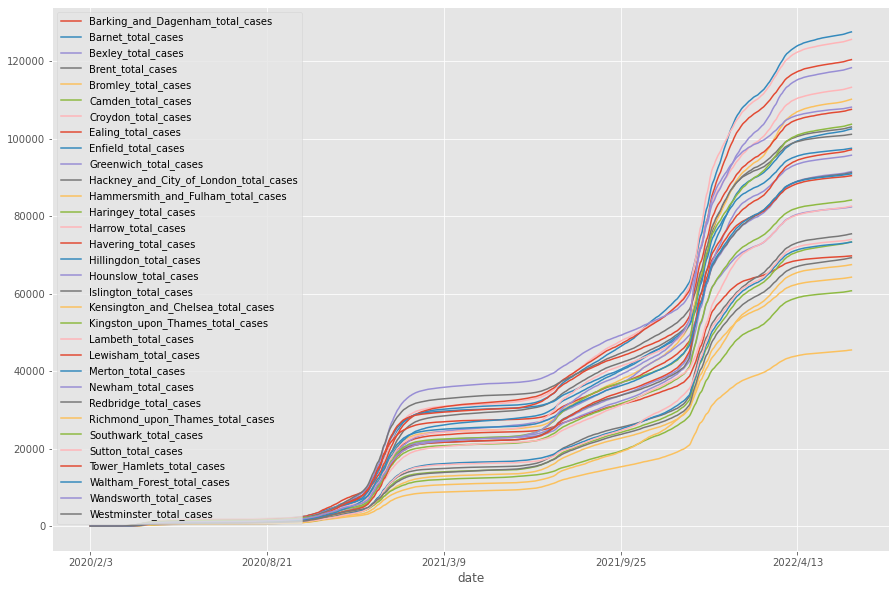

In [40]:
# Setup matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
df2.plot(kind='line', x='date', y='Barking_and_Dagenham_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Barnet_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Bexley_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Brent_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Bromley_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Camden_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Croydon_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Ealing_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Enfield_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Greenwich_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Hackney_and_City_of_London_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Hammersmith_and_Fulham_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Haringey_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Harrow_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Havering_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Hillingdon_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Hounslow_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Islington_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Kensington_and_Chelsea_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Kingston_upon_Thames_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Lambeth_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Lewisham_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Merton_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Newham_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Redbridge_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Richmond_upon_Thames_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Southwark_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Sutton_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Tower_Hamlets_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Waltham_Forest_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Wandsworth_total_cases', ax=axes);
df2.plot(kind='line', x='date', y='Westminster_total_cases', ax=axes);

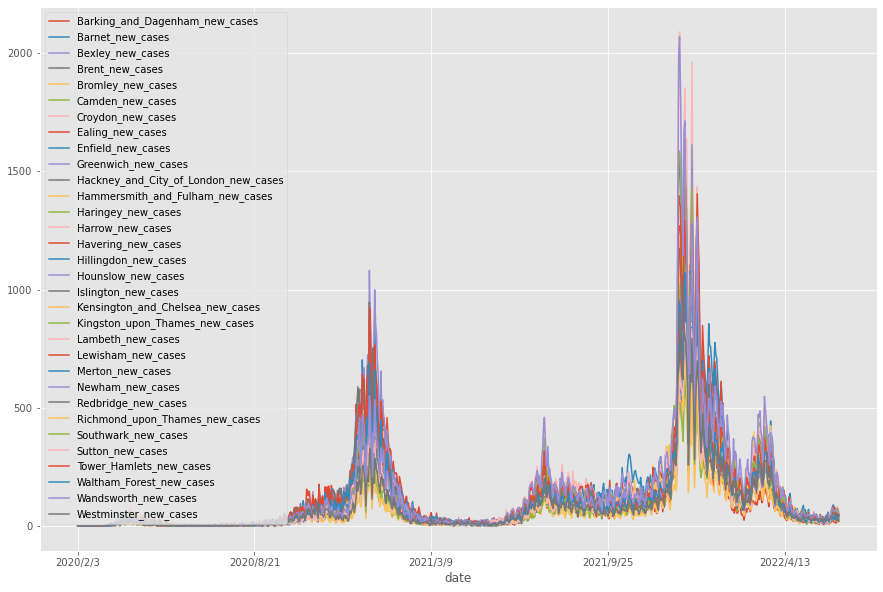

In [41]:
plt.figure(figsize=(15,10))

axes = plt.gca()

df2.plot(kind='line', x='date', y='Barking_and_Dagenham_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Barnet_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Bexley_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Brent_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Bromley_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Camden_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Croydon_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Ealing_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Enfield_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Greenwich_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Hackney_and_City_of_London_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Hammersmith_and_Fulham_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Haringey_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Harrow_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Havering_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Hillingdon_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Hounslow_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Islington_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Kensington_and_Chelsea_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Kingston_upon_Thames_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Lambeth_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Lewisham_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Merton_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Newham_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Redbridge_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Richmond_upon_Thames_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Southwark_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Sutton_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Tower_Hamlets_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Waltham_Forest_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Wandsworth_new_cases', ax=axes);
df2.plot(kind='line', x='date', y='Westminster_new_cases', ax=axes);

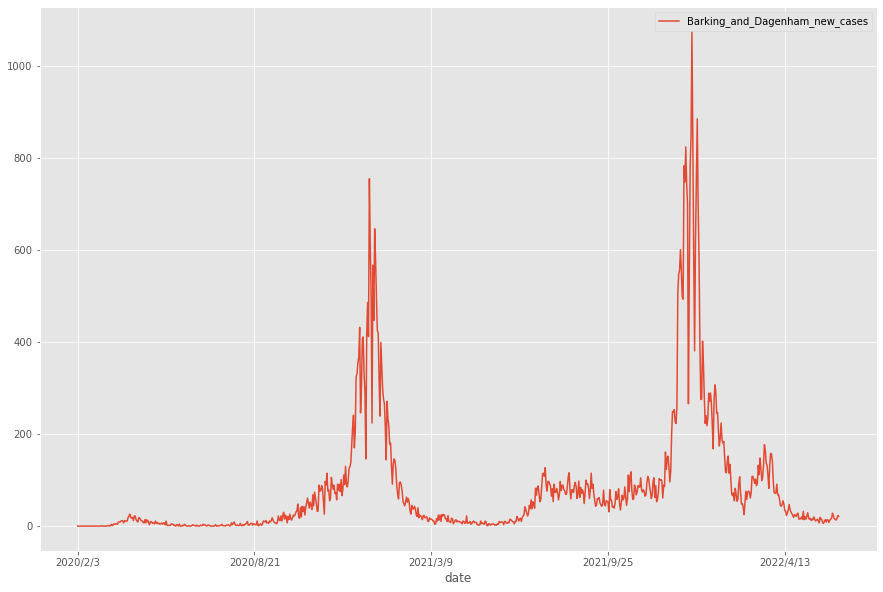

In [42]:
plt.figure(figsize=(15,10))

axes = plt.gca()

df2.plot(kind='line', x='date', y='Barking_and_Dagenham_new_cases', ax=axes);

In [43]:
df2.date = pd.to_datetime(df2.date)
df3 = df2.set_index('date').resample('M').sum().reset_index()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   date                                    29 non-null     datetime64[ns]
 1   Barking_and_Dagenham_new_cases          29 non-null     int64         
 2   Barking_and_Dagenham_total_cases        29 non-null     int64         
 3   Barnet_new_cases                        29 non-null     int64         
 4   Barnet_total_cases                      29 non-null     int64         
 5   Bexley_new_cases                        29 non-null     int64         
 6   Bexley_total_cases                      29 non-null     int64         
 7   Brent_new_cases                         29 non-null     int64         
 8   Brent_total_cases                       29 non-null     int64         
 9   Bromley_new_cases                       29 non-null     

In [44]:
df3.head()

,date,Barking_and_Dagenham_new_cases,Barking_and_Dagenham_total_cases,Barnet_new_cases,Barnet_total_cases,Bexley_new_cases,Bexley_total_cases,Brent_new_cases,Brent_total_cases,Bromley_new_cases,...,Sutton_new_cases,Sutton_total_cases,Tower_Hamlets_new_cases,Tower_Hamlets_total_cases,Waltham_Forest_new_cases,Waltham_Forest_total_cases,Wandsworth_new_cases,Wandsworth_total_cases,Westminster_new_cases,Westminster_total_cases
0,2020-02-29,0,0,1,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20
1,2020-03-31,166,1369,547,4416,196,1601,595,4726,411,...,211,1574,260,2064,294,2001,454,4213,323,3470
2,2020-04-30,382,12132,774,30786,574,15912,891,34538,804,...,589,16676,414,15998,536,18774,534,24044,325,15715
3,2020-05-31,118,19471,204,44923,213,28077,180,49580,264,...,157,27818,75,22267,122,28356,113,32919,68,21415
4,2020-06-30,38,20534,37,46401,47,30258,71,51084,31,...,38,29480,36,23104,57,29335,34,33498,47,22283


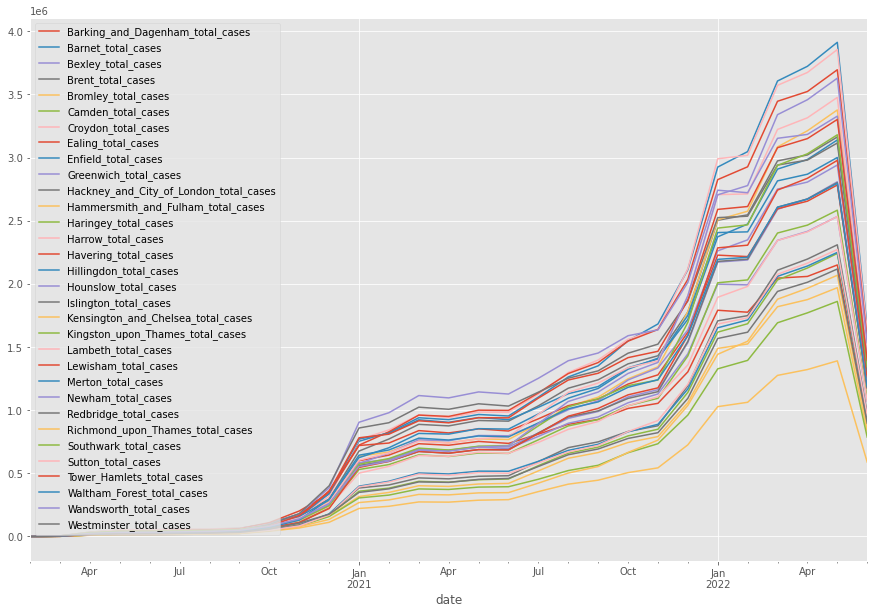

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

axes = plt.gca()

df3.plot(kind='line', x='date', y='Barking_and_Dagenham_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Barnet_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Bexley_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Brent_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Bromley_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Camden_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Croydon_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Ealing_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Enfield_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Greenwich_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Hackney_and_City_of_London_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Hammersmith_and_Fulham_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Haringey_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Harrow_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Havering_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Hillingdon_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Hounslow_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Islington_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Kensington_and_Chelsea_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Kingston_upon_Thames_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Lambeth_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Lewisham_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Merton_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Newham_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Redbridge_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Richmond_upon_Thames_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Southwark_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Sutton_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Tower_Hamlets_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Waltham_Forest_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Wandsworth_total_cases', ax=axes);
df3.plot(kind='line', x='date', y='Westminster_total_cases', ax=axes);

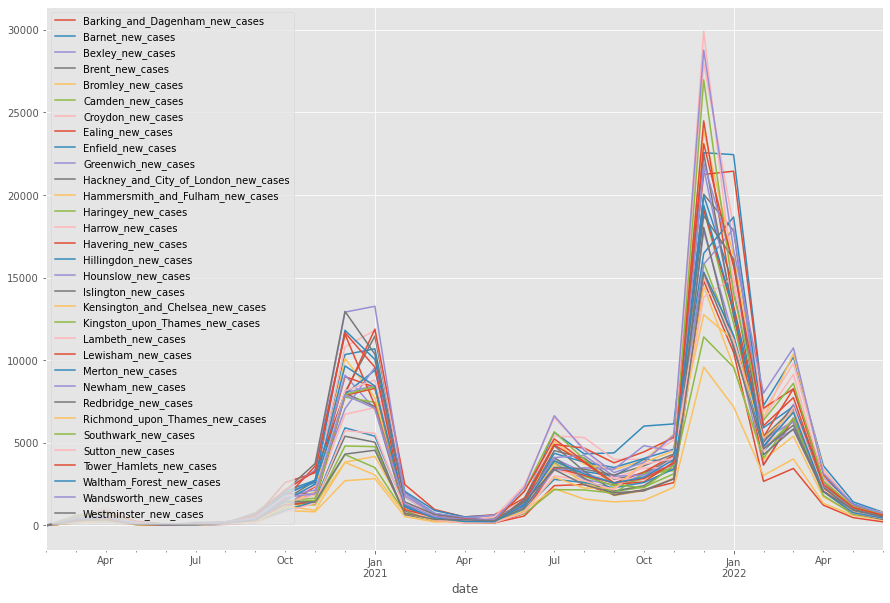

In [46]:
plt.figure(figsize=(15,10))

axes = plt.gca()

df3.plot(kind='line', x='date', y='Barking_and_Dagenham_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Barnet_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Bexley_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Brent_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Bromley_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Camden_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Croydon_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Ealing_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Enfield_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Greenwich_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Hackney_and_City_of_London_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Hammersmith_and_Fulham_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Haringey_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Harrow_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Havering_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Hillingdon_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Hounslow_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Islington_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Kensington_and_Chelsea_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Kingston_upon_Thames_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Lambeth_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Lewisham_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Merton_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Newham_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Redbridge_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Richmond_upon_Thames_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Southwark_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Sutton_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Tower_Hamlets_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Waltham_Forest_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Wandsworth_new_cases', ax=axes);
df3.plot(kind='line', x='date', y='Westminster_new_cases', ax=axes);

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   date                                    29 non-null     datetime64[ns]
 1   Barking_and_Dagenham_new_cases          29 non-null     int64         
 2   Barking_and_Dagenham_total_cases        29 non-null     int64         
 3   Barnet_new_cases                        29 non-null     int64         
 4   Barnet_total_cases                      29 non-null     int64         
 5   Bexley_new_cases                        29 non-null     int64         
 6   Bexley_total_cases                      29 non-null     int64         
 7   Brent_new_cases                         29 non-null     int64         
 8   Brent_total_cases                       29 non-null     int64         
 9   Bromley_new_cases                       29 non-null     

In [48]:
df3.head()

,date,Barking_and_Dagenham_new_cases,Barking_and_Dagenham_total_cases,Barnet_new_cases,Barnet_total_cases,Bexley_new_cases,Bexley_total_cases,Brent_new_cases,Brent_total_cases,Bromley_new_cases,...,Sutton_new_cases,Sutton_total_cases,Tower_Hamlets_new_cases,Tower_Hamlets_total_cases,Waltham_Forest_new_cases,Waltham_Forest_total_cases,Wandsworth_new_cases,Wandsworth_total_cases,Westminster_new_cases,Westminster_total_cases
0,2020-02-29,0,0,1,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20
1,2020-03-31,166,1369,547,4416,196,1601,595,4726,411,...,211,1574,260,2064,294,2001,454,4213,323,3470
2,2020-04-30,382,12132,774,30786,574,15912,891,34538,804,...,589,16676,414,15998,536,18774,534,24044,325,15715
3,2020-05-31,118,19471,204,44923,213,28077,180,49580,264,...,157,27818,75,22267,122,28356,113,32919,68,21415
4,2020-06-30,38,20534,37,46401,47,30258,71,51084,31,...,38,29480,36,23104,57,29335,34,33498,47,22283


In [49]:
df3['date'] = df3['date'].dt.strftime('20%y/%m')
df3.head()

,date,Barking_and_Dagenham_new_cases,Barking_and_Dagenham_total_cases,Barnet_new_cases,Barnet_total_cases,Bexley_new_cases,Bexley_total_cases,Brent_new_cases,Brent_total_cases,Bromley_new_cases,...,Sutton_new_cases,Sutton_total_cases,Tower_Hamlets_new_cases,Tower_Hamlets_total_cases,Waltham_Forest_new_cases,Waltham_Forest_total_cases,Wandsworth_new_cases,Wandsworth_total_cases,Westminster_new_cases,Westminster_total_cases
0,2020/02,0,0,1,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20
1,2020/03,166,1369,547,4416,196,1601,595,4726,411,...,211,1574,260,2064,294,2001,454,4213,323,3470
2,2020/04,382,12132,774,30786,574,15912,891,34538,804,...,589,16676,414,15998,536,18774,534,24044,325,15715
3,2020/05,118,19471,204,44923,213,28077,180,49580,264,...,157,27818,75,22267,122,28356,113,32919,68,21415
4,2020/06,38,20534,37,46401,47,30258,71,51084,31,...,38,29480,36,23104,57,29335,34,33498,47,22283


In [50]:
df3['date'].astype(str)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   date                                    29 non-null     object
 1   Barking_and_Dagenham_new_cases          29 non-null     int64 
 2   Barking_and_Dagenham_total_cases        29 non-null     int64 
 3   Barnet_new_cases                        29 non-null     int64 
 4   Barnet_total_cases                      29 non-null     int64 
 5   Bexley_new_cases                        29 non-null     int64 
 6   Bexley_total_cases                      29 non-null     int64 
 7   Brent_new_cases                         29 non-null     int64 
 8   Brent_total_cases                       29 non-null     int64 
 9   Bromley_new_cases                       29 non-null     int64 
 10  Bromley_total_cases                     29 non-null     int64 
 11  Camden_n

In [51]:
df3[[ "year", "month"]] = df3["date"].str.split("/", expand = True)
df3.head()

,date,Barking_and_Dagenham_new_cases,Barking_and_Dagenham_total_cases,Barnet_new_cases,Barnet_total_cases,Bexley_new_cases,Bexley_total_cases,Brent_new_cases,Brent_total_cases,Bromley_new_cases,...,Tower_Hamlets_new_cases,Tower_Hamlets_total_cases,Waltham_Forest_new_cases,Waltham_Forest_total_cases,Wandsworth_new_cases,Wandsworth_total_cases,Westminster_new_cases,Westminster_total_cases,year,month
0,2020/02,0,0,1,19,0,0,0,0,0,...,0,0,0,0,0,0,1,20,2020,02
1,2020/03,166,1369,547,4416,196,1601,595,4726,411,...,260,2064,294,2001,454,4213,323,3470,2020,03
2,2020/04,382,12132,774,30786,574,15912,891,34538,804,...,414,15998,536,18774,534,24044,325,15715,2020,04
3,2020/05,118,19471,204,44923,213,28077,180,49580,264,...,75,22267,122,28356,113,32919,68,21415,2020,05
4,2020/06,38,20534,37,46401,47,30258,71,51084,31,...,36,23104,57,29335,34,33498,47,22283,2020,06
